In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

local_dir = '/home/will/Projects/PVS'

In [3]:
pvs_data = pd.read_excel(os.path.join(local_dir, 'PVS_data.xlsx'))
pvs_data = pvs_data.dropna()
pvs_data = pvs_data.reset_index(drop=True)
pvs_data.head()

,SessionID,INDDID,AgeAtMRI,Clinical_Read,WM_PVS,WM,WM_PVS/WM,allROIs_weighted_average,pfron_weighted_average,allROIs_median,...,weighted_17Networks_RH_DefaultB_AntTemp_1,weighted_17Networks_RH_DefaultB_PFCd_1,weighted_17Networks_RH_DefaultB_PFCv_1,weighted_17Networks_RH_DefaultC_IPL_1,weighted_17Networks_RH_DefaultC_Rsp_1,weighted_17Networks_RH_DefaultC_PHC_1,weighted_17Networks_RH_TempPar_1,weighted_17Networks_RH_TempPar_2,weighted_17Networks_RH_TempPar_3,weighted_17Networks_RH_TempPar_4
0,116707x20190117x3T,116707,86,Positive,12150.0,417289.0,0.029117,2.156533,0.691856,11281.895896,...,14838.298033,18383.411784,26104.149820,15713.126473,7775.743461,4205.786703,7630.842623,8368.540131,11007.995171,8391.289830
1,124288x20190829x3T,124288,67,Negative,3029.0,367834.0,0.008235,0.253250,0.025977,1062.204982,...,2733.994633,180.967572,1996.266629,-2027.984322,-1946.555105,-282.639022,5045.767012,-468.416483,2503.760738,76.592486
2,124868x20190822x3T,124868,65,Negative,828.0,384376.0,0.002154,-0.108497,-0.026737,-380.114503,...,-782.423745,-5994.380009,8001.589059,53.475662,-394.028740,-1605.253393,-1046.331150,1557.185100,-172.744248,-1407.389392
3,122865x20210209x3T,122865,68,Positive,2104.0,487274.0,0.004318,0.574073,0.093477,2631.993661,...,-5291.542800,1561.270401,-852.133111,9236.100021,659.247516,636.168682,-3075.911487,2064.806358,628.815992,4688.405091
4,122139x20200924x3T,122139,67,Positive,2242.0,490155.0,0.004574,0.112659,0.093841,851.936254,...,1499.602988,5495.254621,-1032.783921,5042.607421,-4401.248276,-3179.358153,-1472.427870,-6865.024979,-2442.329484,259.764092


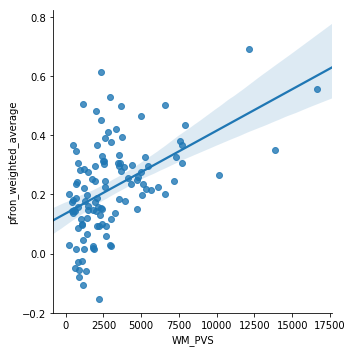

In [80]:
g = sns.lmplot(data=pvs_data, x='WM_PVS', y='pfron_weighted_average')
# g.set(xlim=(0, 11))

In [81]:
import scipy
scipy.stats.pearsonr(pvs_data['WM_PVS'], pvs_data['pfron_weighted_average'])

(0.48986535936454584, 2.3917789930935973e-08)

In [82]:
scipy.stats.spearmanr(pvs_data['WM_PVS'], pvs_data['pfron_weighted_average'])

SpearmanrResult(correlation=0.4971648682036821, pvalue=1.3706155718508564e-08)

In [68]:
np.cov(pvs_data['WM_PVS/WM'], pvs_data['allROIs_weighted_average'])

array([[3.81713325e-05, 1.72558890e-03],
       [1.72558890e-03, 2.99585978e-01]])

In [70]:
df_filtered = pvs_data[pvs_data['WM_PVS/WM'] < 10000]

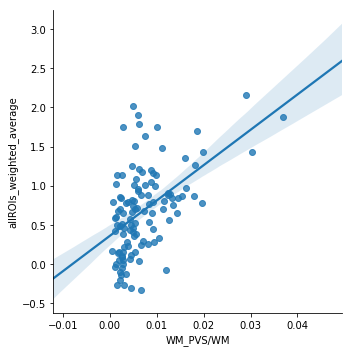

In [71]:
g2 = sns.lmplot(data=df_filtered, x='WM_PVS/WM', y='allROIs_weighted_average')


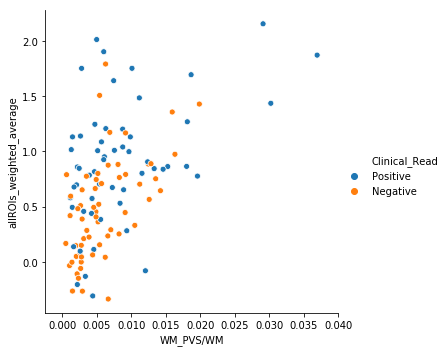

In [4]:
sns.relplot(data=pvs_data, x='WM_PVS/WM', y='allROIs_weighted_average', hue='Clinical_Read')

In [73]:
scipy.stats.pearsonr(df_filtered['WM_PVS/WM'], df_filtered['allROIs_weighted_average'])

(0.5102792843280435, 4.8752159878507384e-09)